In [49]:
from scipy.io import arff
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier

In [85]:
results = pd.DataFrame()
results_columns = pd.DataFrame()

for dirpath, dirnames, filenames in os.walk("../data_sets/data/", topdown=False):
    for name in filenames:
        fullpath = os.path.join(dirpath, name)
        data = pd.DataFrame(arff.loadarff(fullpath)[0])
        data['class'] = data['class'].str.decode('utf-8')
        data['year'] = float(name[0])
        results = pd.concat([results,data],axis=0).reset_index(drop=True)
        
                

In [86]:
results.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,0,2.0
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,0,2.0
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,0,2.0
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,0,2.0
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,0,2.0


In [87]:
results.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22

In [72]:
missing_cols = results.columns[results.isnull().any()]

In [92]:
results.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,2.939753
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,1.283975
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,1.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,2.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,3.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,5.000000


<Figure size 1000x1000 with 0 Axes>

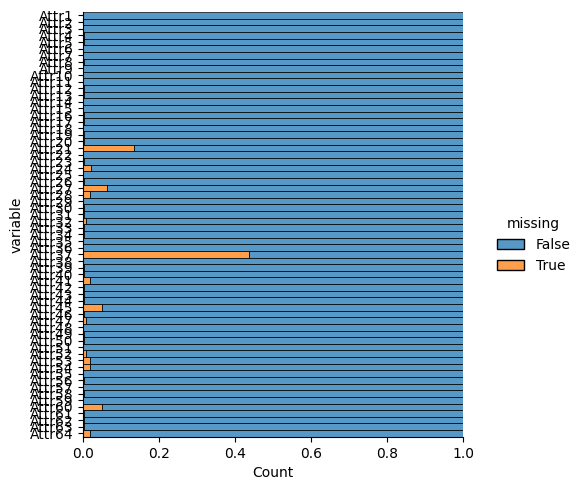

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.displot(
    data=results[missing_cols].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill"
)

# Impute missing data

In [78]:
from sklearn.impute import SimpleImputer

In [155]:
mean_imp = SimpleImputer(missing_values = pd.NA,strategy='mean')
median_imp = SimpleImputer(strategy = 'median')
freq_imp = SimpleImputer(strategy = 'most_frequent')

In [121]:
impute_cols = list(results.loc[:, ~results.columns.isin(['year','class'])].columns)

In [169]:
df_impute = results


df_mean = pd.DataFrame(mean_imp.fit_transform(df_impute),columns = df_impute.columns)
df_median = pd.DataFrame(median_imp.fit_transform(df_impute),columns = df_impute.columns)
df_freq = pd.DataFrame(freq_imp.fit_transform(df_impute),columns = df_impute.columns)

In [170]:
df_impute.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class', 'year'],
      dtype='object')

In [171]:
df_mean.isnull().any()

Attr1     False
Attr2     False
Attr3     False
Attr4     False
Attr5     False
          ...  
Attr62    False
Attr63    False
Attr64    False
class     False
year      False
Length: 66, dtype: bool

In [148]:
df_median.columns[results.isnull().any()]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63],
           dtype='int64')

In [ ]:
df_freq.columns[results.isnull().any()]

# Begin Modeling

In [174]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

X = df_mean.loc[:, df_mean.columns != 'class']
y = df_mean['class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=0,
                                                    stratify=y)

In [176]:
model = RandomForestClassifier()

# Train the model on training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [177]:
model_results=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
model_results

,Actual,Predicted
32268,0.0,0.0
29057,0.0,0.0
12790,0.0,0.0
13806,0.0,0.0
24269,0.0,0.0
...,...,...
32417,0.0,0.0
20278,1.0,0.0
36141,1.0,1.0
14193,0.0,0.0


In [178]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.032484736781476786
Mean Squared Error: 0.032484736781476786
Root Mean Squared Error: 0.1802352262502444


/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


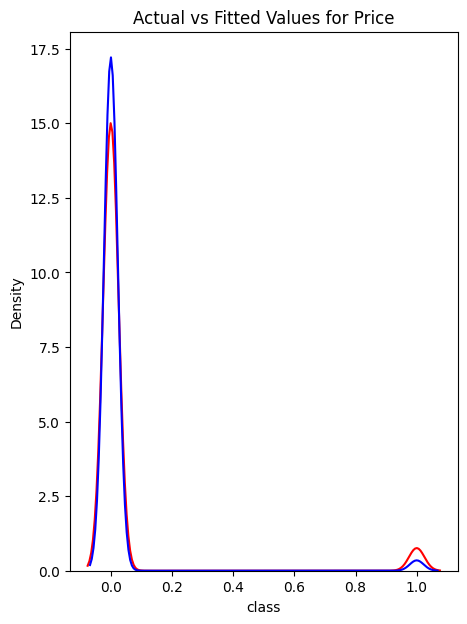

In [179]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

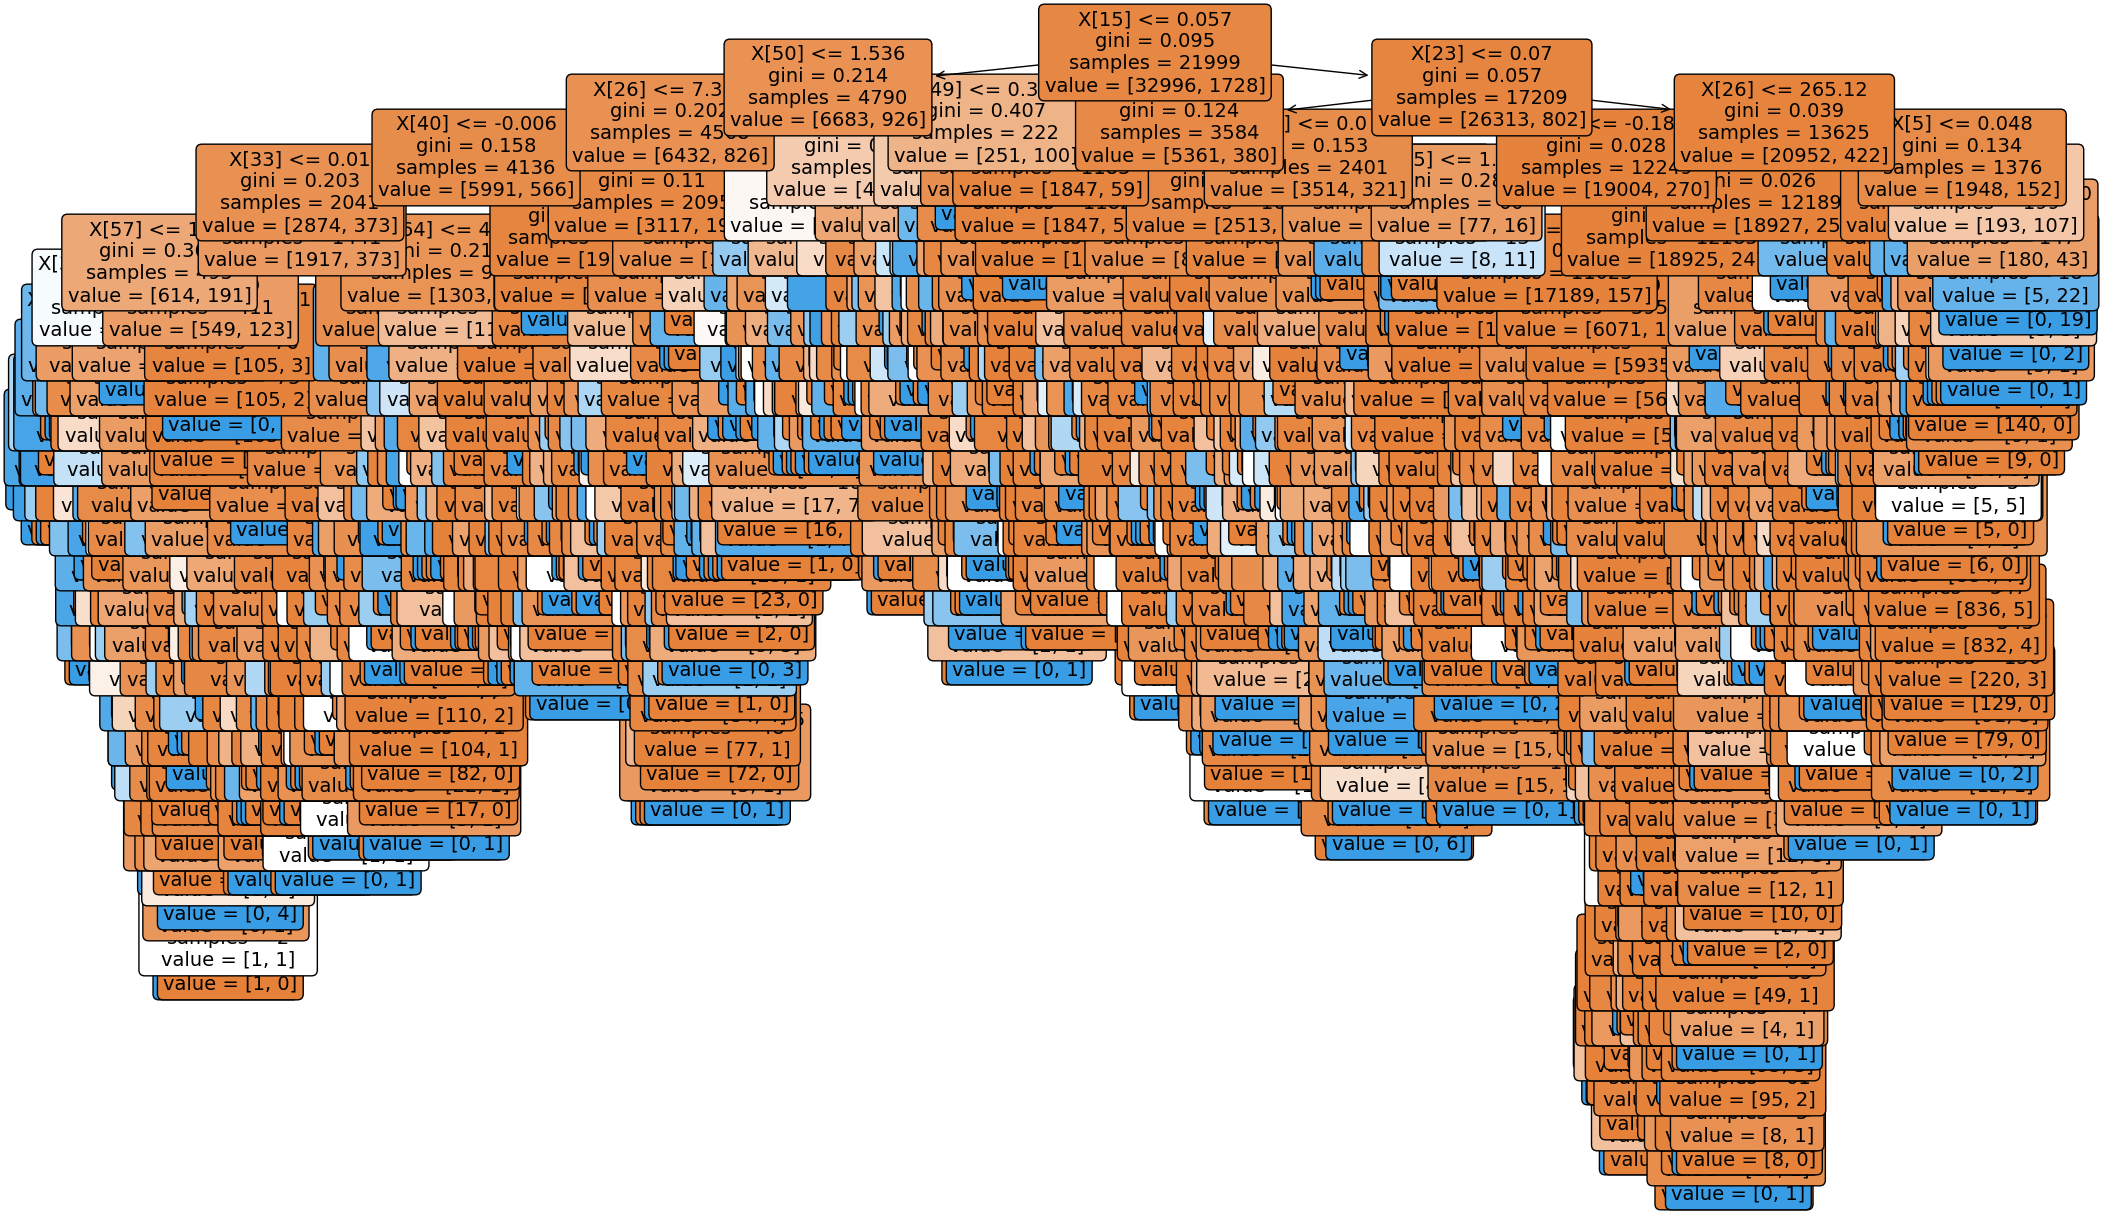

In [180]:
import pydot
# Pull out one tree from the forest
Tree =  model.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);